In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing data
data = pd.read_csv('train_cleaned.csv')
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [3]:
#seperating independent and dependent variables
x = data.drop(['Item_Outlet_Sales'], axis=1)
y = data['Item_Outlet_Sales']

In [4]:
# creating train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 56)

### Linear Regression

In [5]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [6]:
# Creating instance of Linear Regresssion
lr = LR(normalize=True)

# Fitting the model
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [7]:
# Predicting over the Train Set and calculating error
y_train_predict = lr.predict(x_train)
k = mae(y_train_predict, y_train)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 826.394330350438


In [8]:
# Predicting over the Test Set and calculating error
y_test_predict = lr.predict(x_test)
k = mae(y_test_predict, y_test)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     878.748864570624


In [9]:
#parameters of equation
lr.intercept_

9.228301871711469e+17

In [10]:
lr.coef_

array([ 2.09935572e+00, -7.69279207e+02,  1.54649616e+01, -4.54582320e+14,
        3.24047880e+16,  3.24047880e+16,  3.24047880e+16,  3.24047880e+16,
        3.24047880e+16, -3.70804004e+15, -3.70804004e+15, -3.70804004e+15,
       -3.70804004e+15, -3.70804004e+15, -3.70804004e+15, -3.70804004e+15,
       -3.70804004e+15, -3.70804004e+15, -3.70804004e+15, -3.70804004e+15,
       -3.70804004e+15, -3.70804004e+15, -3.70804004e+15, -3.70804004e+15,
       -3.70804004e+15, -4.37456954e+15,  1.55246431e+16, -1.52671660e+15,
       -2.57254610e+16, -6.80528432e+15,  4.59065146e+16,  2.33310669e+16,
       -3.79962820e+15, -4.11378421e+15, -3.31165794e+16, -2.76631059e+16,
        3.69042936e+15, -2.62215305e+16,  3.03219984e+15, -2.12305751e+16,
       -1.97104753e+16, -1.91864148e+16, -1.64229270e+16,  3.47445288e+15,
       -7.90674984e+16])

Text(0.5, 1.0, 'Coefficient plot')

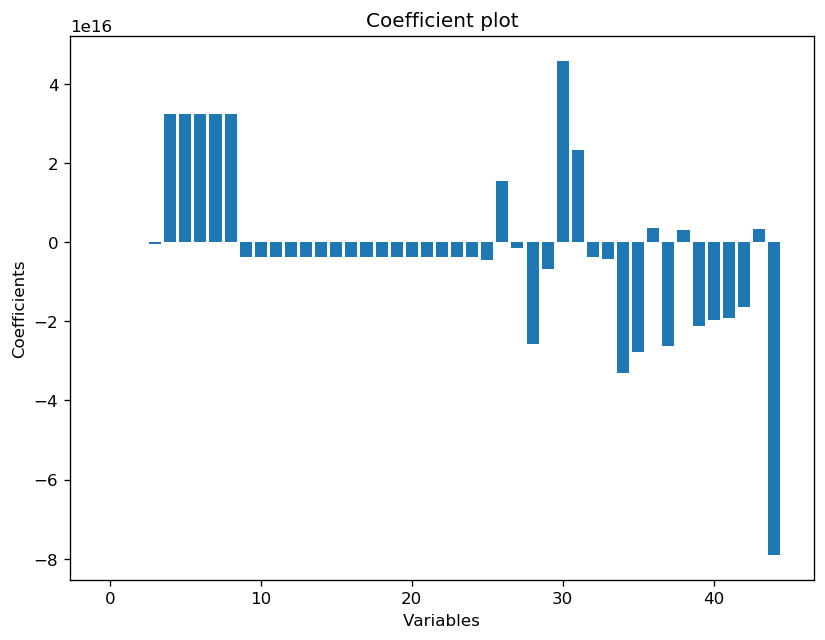

In [11]:
#plotting of coefficients for each independent variables
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(x_train.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

### Assumptions of linear model -check

In [12]:
#finding residuals
residuals=pd.DataFrame({'actual values':y_test,'predicted values':y_test_predict})

In [13]:
residuals['resid']=residuals['actual values']-residuals['predicted values']
residuals.head()

,actual values,predicted values,resid
2172,697.7584,768.0,-70.2416
6228,1414.1592,2432.0,-1017.8408
2404,3078.6592,2944.0,134.6592
99,1314.2892,3072.0,-1757.7108
4945,1403.5064,1408.0,-4.4936


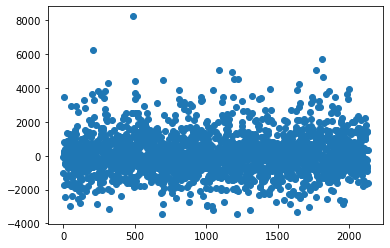

In [14]:
#plotting residuals vs actual values
plt.scatter(range(0,2131),residuals['resid'],label='res')

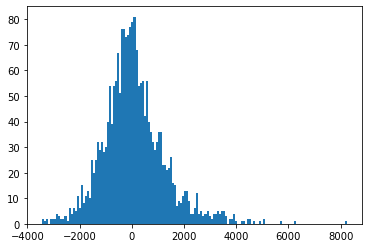

In [15]:
plt.hist(residuals.resid, bins = 150)
plt.show()

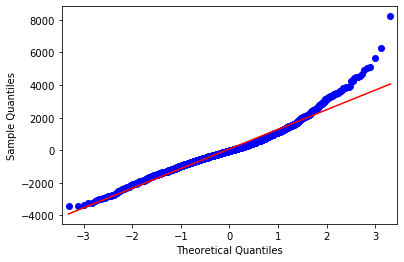

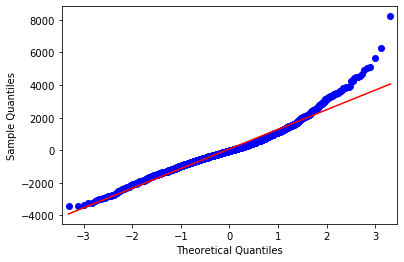

In [16]:
from statsmodels.graphics.gofplots import qqplot
#fig, ax = plt.subplots()
qqplot(residuals.resid,line='s')

In [17]:
#check for multicollinearity 
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculating VIF for every column (only works for the not Catagorical)
VIF = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index =data.columns)
VIF


c:\users\jyothi srilekha - pc\appdata\local\programs\python\python37\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Item_Weight                        2.349925
Item_Visibility                    1.101456
Item_MRP                           1.753170
Outlet_Establishment_Year               inf
Item_Outlet_Sales                  2.292720
Item_Fat_Content_LF                     inf
Item_Fat_Content_Low Fat                inf
Item_Fat_Content_Regular                inf
Item_Fat_Content_low fat                inf
Item_Fat_Content_reg                    inf
Item_Type_Baking Goods                  inf
Item_Type_Breads                        inf
Item_Type_Breakfast                     inf
Item_Type_Canned                        inf
Item_Type_Dairy                         inf
Item_Type_Frozen Foods                  inf
Item_Type_Fruits and Vegetables         inf
Item_Type_Hard Drinks                   inf
Item_Type_Health and Hygiene            inf
Item_Type_Household                     inf
Item_Type_Meat                          inf
Item_Type_Others                        inf
Item_Type_Seafood               

 ### ENSEMBLE TECHNIQUE 







In [18]:
#importing libraries to create models

from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [19]:

model1=LinearRegression()
model1.fit(x_train,y_train)
pred1=model1.predict(x_test)
pred1[:10],model1.score(x_test,y_test)

(array([ 906.20464831, 2544.71949525, 3008.95743802, 3045.1971139 ,
        1453.01171323, 2466.57950015,   57.15803436, 3709.18014298,
        2837.03664668, 4192.52190678]), 0.5405091955931177)

In [20]:
model2=KNeighborsRegressor(n_neighbors=5)
model2.fit(x_train,y_train)
pred2=model2.predict(x_test)
pred2[:10],model2.score(x_test,y_test)

(array([2173.837  , 1819.23192, 4498.01164, 4164.84532, 1354.50352,
        1993.27204,  253.53664, 4227.69684, 2643.8918 , 4586.29672]),
 0.4644596235100827)

In [21]:
model3=DecisionTreeRegressor(max_depth=7)
model3.fit(x_train,y_train)
pred3=model3.predict(x_test)
pred3[:10],model3.score(x_test,y_test)

(array([ 354.1462293 , 2424.2627469 , 2741.40669569, 3106.80804274,
        1323.64226448, 2685.38674777,  177.06581111, 3152.94051546,
        2741.40669569, 5102.63144872]), 0.5686189724969581)

In [22]:
import numpy as np
from statistics import mean
final_pred=[]
for i in range(0,len(x_test)):
    final_pred.append(mean([pred1[i],pred2[i],pred3[i]]))

In [23]:
from sklearn.metrics import r2_score
r2_score(y_test, final_pred)

0.5588216059519621